# What will the slit look like with a binary on it?

And how does it depend on seeing, and PA and separation uncertainty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u

from tqdm import tqdm
import warnings

import sys
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The slit dimensions at Gemini are:
$$0.34'' \times 5''$$

In [2]:
platescale = 0.1 # arcseconds per pixel for 3 pixels per slit.

In [3]:
ycoord, xcoord = np.arange(-4, 4, platescale), np.arange(-4, 4, platescale) # units of arcseconds

In [4]:
xcoord.shape, ycoord.shape

((80,), (80,))

In [5]:
xx, yy = np.meshgrid(xcoord, ycoord)

In [6]:
from scipy.stats import multivariate_normal

The seeing is reported in FWHM, but we want $\sigma$, so we need to convert:
$$\mathrm{FWHM} =   2\sqrt{2 \ln 2 } \; \sigma \approx 2.355 \; \sigma$$

In [7]:
FWHM_per_sigma = 2.355

In [8]:
seeing_fwhm = 0.5 # FWHM arcseconds
seeing_sigma = seeing_fwhm / FWHM_per_sigma

In [9]:
seeing_cov_matrix = np.diag(2*[seeing_sigma**2])

In [10]:
delta_PA = 6.0 # degrees
separation = 1.1
x_wrong = np.sin(delta_PA * np.pi / 180) * separation
y_wrong = np.cos(delta_PA * np.pi / 180) * separation

In [11]:
mvn1 = multivariate_normal(mean=[0.0, 0.0], cov=seeing_cov_matrix)
mvn2 = multivariate_normal(mean=[x_wrong, -1*y_wrong], cov=seeing_cov_matrix)

In [12]:
coords = np.vstack([xx.reshape(-1), yy.reshape(-1)]).T

In [13]:
source1 = mvn1.pdf(coords).reshape(xx.shape)
source2 = mvn2.pdf(coords).reshape(xx.shape)

In [14]:
dx = (xcoord[1]-xcoord[0])/2.
dy = (ycoord[1]-ycoord[0])/2.
extent = [xcoord[0]-dx, xcoord[-1]+dx, ycoord[0]-dy, ycoord[-1]+dy]

In [15]:
xw = 0.34 # arcseconds
yw = 5.00 # arcseconds

In [16]:
slit_mask = ( ((xx < xw/2) & (xx > -xw/2)) &
              ((yy < yw/2) & (yy > -yw/2)) )

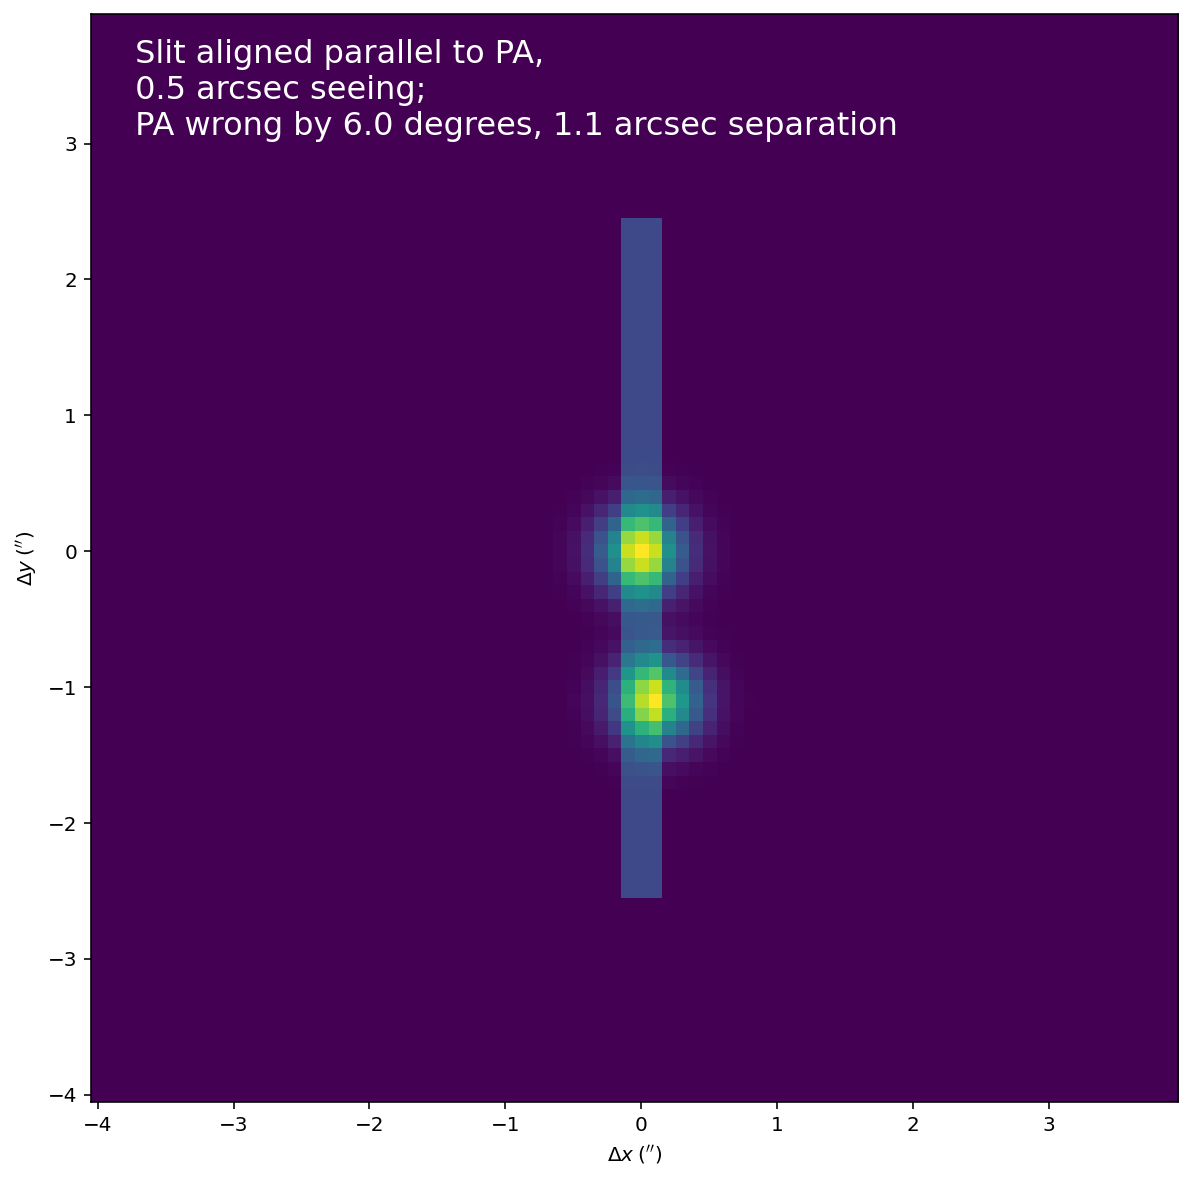

In [17]:
plt.figure(figsize=(10,10))
plt.imshow((source1+source2)  + slit_mask, extent=extent, origin='lower', aspect='equal');
plt.xlabel("$\Delta x \;(\'\')$")
plt.ylabel('$\Delta y \;(\'\')$ ');
text_label = ' Slit aligned parallel to PA, \n {:0.1f} arcsec seeing; \n PA wrong by {:0.1f} degrees, 1.1 arcsec separation\n'.format(seeing_fwhm, delta_PA)
plt.text(-3.8, 2.8, text_label,color='w', fontsize=16)
plt.savefig('../figures/IGRINS_parallel_PA_slit_0p5_seeing.png', dpi=300, bbox_inches='tight')

What about aligning the slit perpendicular to the PA?

In [18]:
slit_mask_perp = ( ((xx < yw/2) & (xx > -yw/2)) &
              ((yy < xw/2) & (yy > -xw/2)) )

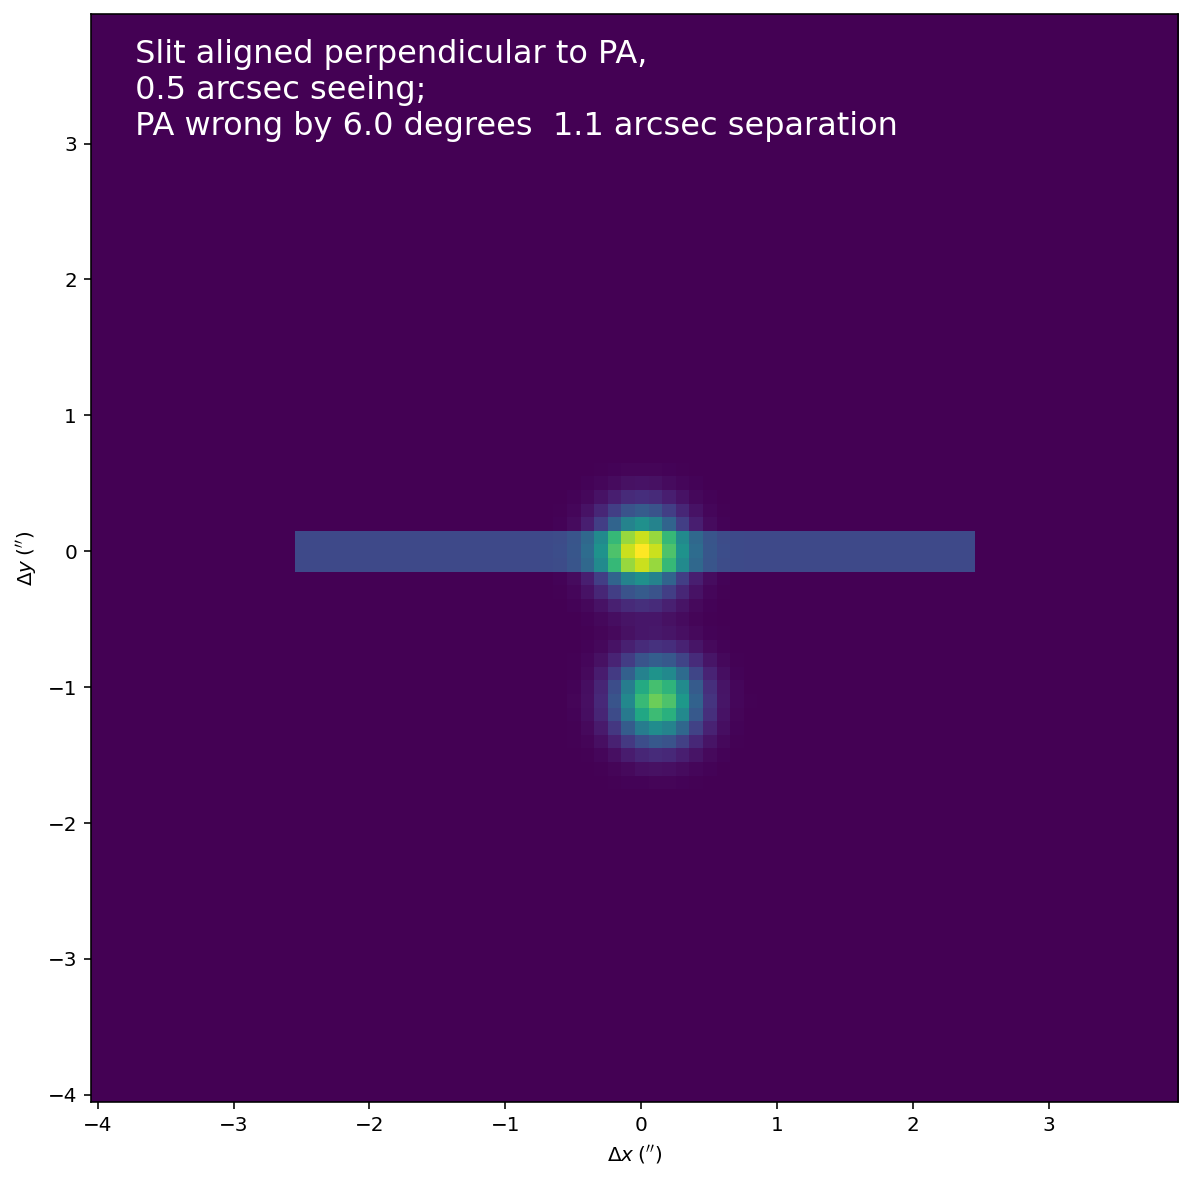

In [19]:
plt.figure(figsize=(10,10))
plt.imshow((source1+source2)  + slit_mask_perp, extent=extent, origin='lower', aspect='equal');
plt.xlabel("$\Delta x \;(\'\')$")
plt.ylabel('$\Delta y \;(\'\')$ ');

text_label = ' Slit aligned perpendicular to PA, \n {:0.1f} arcsec seeing; \n PA wrong by {:0.1f} degrees  1.1 arcsec separation \n'.format(seeing_fwhm, delta_PA)
plt.text(-3.8, 2.8, text_label,color='w', fontsize=16);
plt.savefig('../figures/IGRINS_perpendicular_PA_slit_0p5_seeing.png', dpi=300, bbox_inches='tight')

The end.